In [79]:
import json
import argparse
import code
from pprint import pprint
from termcolor import colored
import re
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import namedtuple, Counter

import numpy as np
from typing import Dict, Any
from tqdm.auto import tqdm

from nltk.tokenize import RegexpTokenizer

stop_words = set(stopwords.words('english'))

In [34]:
code_file = '../raw-datasets/django/all.code'
anno_file = '../raw-datasets/django/all.anno'

In [99]:
code_lines = [l.strip() for l in open(code_file, "rt").readlines()]
anno_lines = [l.strip() for l in open(anno_file, "rt").readlines()]

assert len(code_lines) == len(anno_lines)

example = namedtuple("Example", ["code", "label"])

data = list(map(lambda x : example(*x), zip(code_lines, anno_lines)))

In [36]:
for _ in range(1):
    _x = random.sample(data, 1)[0]
    print("code:\t", _x.code, "\nlabel:\t", _x.label, "\n", "-"*16)

code:	 else : 
label:	 if not, 
 ----------------


### Vocabulary

In [83]:
# random.sample(anno_lines, 1)[0].split()

tokenizer = RegexpTokenizer(r'\w+')

anno_vocab = Counter()

for a in tqdm(anno_lines):
    for w in filter(lambda x : x not in stop_words, tokenizer.tokenize(a)):
        anno_vocab[w] += 1

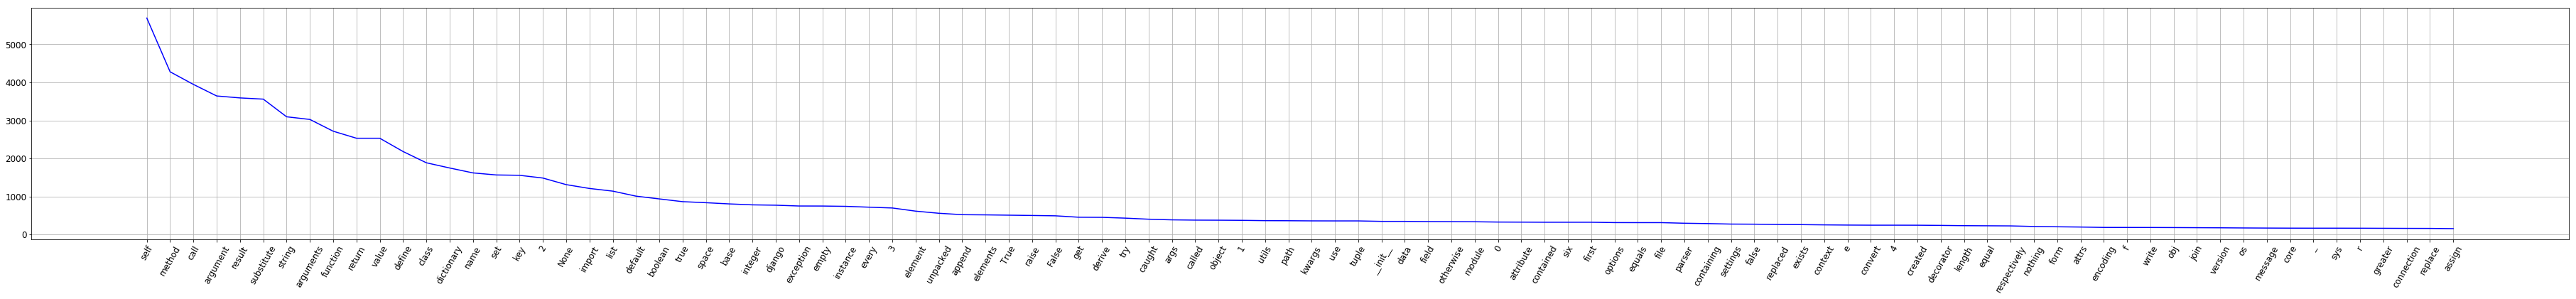

In [90]:
n = 100
words, counts = zip(*anno_vocab.most_common(n))

plt.figure(figsize=(int(0.64 * n),6))
plt.xticks(range(len(words)), words, rotation=60, fontsize=12)
plt.yticks(fontsize=12)
# plt.yscale('symlog')
plt.plot(range(len(words)), counts, 'b-')
plt.grid()
plt.show()

In [96]:
n = len(anno_vocab)
[(x, y) for (x, y) in anno_vocab.most_common() if 100 <= y <= 200]

[('attrs', 198),
 ('encoding', 188),
 ('f', 187),
 ('write', 186),
 ('obj', 184),
 ('join', 181),
 ('version', 178),
 ('os', 174),
 ('message', 171),
 ('core', 169),
 ('_', 168),
 ('sys', 168),
 ('r', 167),
 ('greater', 165),
 ('connection', 163),
 ('replace', 162),
 ('assign', 156),
 ('token', 154),
 ('force_text', 153),
 ('model', 151),
 ('help', 150),
 ('format', 146),
 ('5', 145),
 ('output', 145),
 ('bits', 143),
 ('initial', 142),
 ('ValueError', 139),
 ('evaluates', 136),
 ('request', 136),
 ('index', 136),
 ('app_config', 129),
 ('func', 128),
 ('errors', 127),
 ('n', 127),
 ('doesnt', 125),
 ('character', 125),
 ('loop', 125),
 ('fields', 125),
 ('response', 122),
 ('x', 121),
 ('k', 120),
 ('database', 120),
 ('db', 119),
 ('handler', 118),
 ('code', 116),
 ('item', 116),
 ('converted', 115),
 ('datetime', 115),
 ('number', 115),
 ('stream', 114),
 ('match', 113),
 ('renamed', 112),
 ('remove', 112),
 ('msg', 112),
 ('type', 111),
 ('second', 111),
 ('separated', 111),
 ('ren